In [1]:
import numpy as np
import os
os.chdir("C:\\Users\\ma11115\\OneDrive - Imperial College London\\github_folder\\STK_SEARCH")
import pandas as pd


In [7]:
from stk_search.Objective_function import Look_up_table
from stk_search.Search_algorithm import Bayesian_Optimisation
from stk_search.Search_algorithm import Representation_slatm,RepresentationPrecursor
import numpy as np
import os
os.chdir("C:\\Users\\ma11115\\OneDrive - Imperial College London\\github_folder\\STK_SEARCH")
import pandas as pd
from stk_search import Database_utils
from stk_search import Searched_space
from stk_search.Search_algorithm import Search_algorithm
from stk_search.Search_Exp import Search_Exp
#%% 
# Load the searched space
df_path = 'data/output/Full_datatset/df_total_2023_10_30.csv'
df_precursors_path = 'data/output/Prescursor_data/calculation_data_precursor_190923_clean.pkl'#'Data/output/Prescursor_data/calculation_data_precursor_310823_clean.pkl'
df_total, df_precursors = Database_utils.load_data_from_file(df_path, df_precursors_path)


search_space_loc = "data/input/search_space/test/search_space1.pkl"
# get initial elements
objective_function = Look_up_table(df_total,6)



C:\Users\ma11115\OneDrive - Imperial College London\github_folder\STK_search\src\stk_search\Database_utils.py:106: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_total = pd.read_csv(df_path)


NameError: name 'num_iteration' is not defined

In [37]:
import importlib
importlib.reload(Bayesian_Optimisation)
case = "slatm"
if case == "slatm":
    BO = Bayesian_Optimisation.Bayesian_Optimisation()
    BO.Representation = Representation_slatm.Representation_slatm()
    BO.PCA_input = True
    search_algorithm = BO
elif case == "slatm_org":
    BO = Bayesian_Optimisation.Bayesian_Optimisation()
    BO.Representation = Representation_slatm.Representation_slatm_org(df_total)
    BO.PCA_input = True
    search_algorithm = BO
elif case == "precursor":
    BO = Bayesian_Optimisation.Bayesian_Optimisation()
    frag_properties = []
    frag_properties = df_precursors.columns[1:7]
    frag_properties = frag_properties.append(df_precursors.columns[17:23])
    print(frag_properties)
    BO.Representation = RepresentationPrecursor.RepresentationPrecursor(
        df_precursors, frag_properties
    )
    search_algorithm = BO
elif case == 'random':
    search_algorithm = Search_algorithm.random_search()
elif case == 'evolution_algorithm':
    search_algorithm = Search_algorithm.evolution_algorithm()
else:
    raise ValueError("case not recognised")



In [17]:
from stk_search import Search_Exp

number_of_iterations = 10
verbose = True
num_elem_initialisation = 200

In [38]:
def initialise_test(S_exp):
    # save the search experiment
    if not S_exp.benchmark:
        S_exp.save_search_experiment()
    # initialise the search space
    # get initial elements
    ids_acquired, df_search_space= S_exp.search_algorithm.initial_suggestion(
        SP =S_exp.search_space,
        num_elem_initialisation=S_exp.num_elem_initialisation,
        benchmark=S_exp.benchmark,
        df_total=S_exp.df_total,
    )
    S_exp.df_search_space = df_search_space
    for id in range(S_exp.num_elem_initialisation):
        # evaluate the element
        S_exp.evaluate_element(
            element_id=ids_acquired[id],
            objective_function=S_exp.objective_function,
        )
    return S_exp
def run_algo_test(S_exp):
    # run the search
    for id in range(S_exp.number_of_iterations):
        # suggest the next element
        ids_acquired, df_search_space = S_exp.search_algorithm.suggest_element(
            search_space_df=S_exp.df_search_space,
            ids_acquired=S_exp.ids_acquired,
            fitness_acquired=S_exp.fitness_acquired,
            SP = S_exp.search_space,
            benchmark=S_exp.benchmark,
            df_total=S_exp.df_total,
        )
        S_exp.df_search_space = df_search_space
        # evaluate the element
        if S_exp.verbose:
            print(f"element id suggested: {ids_acquired}")
        S_exp.evaluate_element(
            element_id=ids_acquired,
            objective_function=S_exp.objective_function,
        )
        # S_exp.fitness_acquired.append(Eval)
        # S_exp.InchiKey_acquired.append(InchiKey)
        # save the results
        #if S_exp.verbose:
            #print(f"iteration {id} completed")
            #print(f"fitness acquired: {S_exp.fitness_acquired}")
            #print(f"InchiKey acquired: {S_exp.InchiKey_acquired}")
            #print(f"ids acquired: {S_exp.ids_acquired}")
    # save the results

S_exp = Search_Exp.Search_exp(
    search_space_loc,
    search_algorithm,
    objective_function,
    number_of_iterations,
    verbose=verbose,
)
test_name = "test1" 
S_exp.output_folder = "data/output/search_experiment/test/" + test_name
S_exp.num_elem_initialisation = num_elem_initialisation
S_exp.benchmark = True
S_exp.df_total = df_total
S_exp.initialise_search_space()

S_exp.num_elem_initialisation = 30
S_exp = initialise_test(S_exp)
S_exp.number_of_iterations = 5
run_algo_test(S_exp)
from stk_search.Search_algorithm import Search_algorithm
importlib.reload(Search_algorithm)
search_algorithm_EA = Search_algorithm.evolution_algorithm()
S_exp_EA = Search_Exp.Search_exp(
    search_space_loc,
    search_algorithm_EA,
    objective_function,
    number_of_iterations,
    verbose=verbose,
)
test_name = "test1" 
S_exp_EA.output_folder = "data/output/search_experiment/test/" + test_name
S_exp_EA.num_elem_initialisation = num_elem_initialisation
S_exp_EA.benchmark = True
S_exp_EA.df_total = df_total
S_exp_EA.initialise_search_space()

S_exp_EA.num_elem_initialisation = 30
S_exp_EA = initialise_test(S_exp_EA)
S_exp_EA.number_of_iterations = 5
#run_algo_test(S_exp_EA)

(143, 6)
PCA Done


c:\Users\ma11115\AppData\Local\miniconda3\envs\STKSearch\lib\site-packages\botorch\models\utils\assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)


new_element_df shape is  (143, 6)
36
element id suggested: 30
(156, 6)
PCA Done
new_element_df shape is  (156, 6)
37
element id suggested: 31


c:\Users\ma11115\AppData\Local\miniconda3\envs\STKSearch\lib\site-packages\botorch\models\utils\assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)


(137, 6)
PCA Done


c:\Users\ma11115\AppData\Local\miniconda3\envs\STKSearch\lib\site-packages\botorch\models\utils\assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)


new_element_df shape is  (137, 6)
21
element id suggested: 32
(172, 6)
PCA Done


c:\Users\ma11115\AppData\Local\miniconda3\envs\STKSearch\lib\site-packages\botorch\models\utils\assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)


new_element_df shape is  (172, 6)
77
element id suggested: 33
(139, 6)
PCA Done


c:\Users\ma11115\AppData\Local\miniconda3\envs\STKSearch\lib\site-packages\botorch\models\utils\assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)


new_element_df shape is  (139, 6)
31
element id suggested: 34


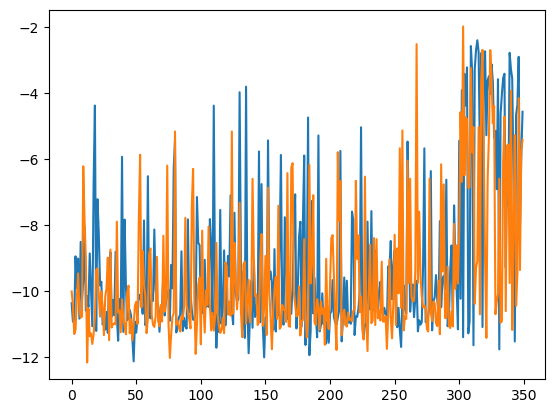

In [34]:
# plot S_exp fitness
%matplotlib inline
import matplotlib.pyplot as plt 
plt.plot(S_exp.fitness_acquired)
plt.plot(S_exp_EA.fitness_acquired)
plt.show()

In [40]:
S_exp.output_folder = "data/output/search_experiment/test/" + test_name
S_exp.num_elem_initialisation = num_elem_initialisation
S_exp.benchmark = False
S_exp.df_total = df_total
S_exp.initialise_search_space()

S_exp.num_elem_initialisation = 30
S_exp = initialise_test(S_exp)
S_exp.number_of_iterations = 5

In [41]:
ids_acquired, df_search_space = S_exp.search_algorithm.suggest_element(
            search_space_df=S_exp.df_search_space,
            ids_acquired=S_exp.ids_acquired,
            fitness_acquired=S_exp.fitness_acquired,
            SP = S_exp.search_space,
            benchmark=S_exp.benchmark,
            df_total=S_exp.df_total,
        )

KeyError: '[30, 31, 32, 33, 34] not in index'